<a href="https://colab.research.google.com/github/Fuenfgeld/DatamanagementAndArchiving/blob/main/ML-Prototype/Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction Example 1 (Supervised Learning)
Predicing the procedure based on patient data (Age, Gender, Race) and diagnoses




In [ ]:
# install the newest version 
# !pip3 install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


# Importing Libraries

In [ ]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas_profiling import ProfileReport

In [ ]:
# will make plot outputs appear and stored within the notebook.
%matplotlib inline

In [ ]:
# check version
import pandas_profiling
pandas_profiling.version.__version__
# => 2.9.0

'2.10.0'

In [ ]:
from google.colab import drive
# mount drive to access database
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
material_path = "/content/drive/Shareddrives/05_BIDS_Datenmanagement & Archivierung im Umfeld der Forschung/Material"

In [ ]:
# list of datawarehoses
!ls "/content/drive/Shareddrives/05_BIDS_Datenmanagement & Archivierung im Umfeld der Forschung/Material/DWH_dbs"

DWH_allergy.db		  DWH_covid19.db
DWH_allergy_test.db	  DWH_dermatitis.db
DWH_asthma.db		  DWH_lung_cancer.db
DWH_breast_cancer.db	  DWH_metabolic_syndrome_disease.db
DWH_colorectal_cancer.db  DWH_patients.db



# Loading Data


In [ ]:
# type of patient
patient_type = "allergy"

In [ ]:
# datawarehouse path
DB_DWH_PATH = f"{material_path}/DWH_dbs/DWH_{patient_type}_test.db"
print("Datawarehouse: ", DB_DWH_PATH)
# connect to db
dwh_conn = sqlite3.connect(DB_DWH_PATH)

Datawarehouse:  /content/drive/Shareddrives/05_BIDS_Datenmanagement & Archivierung im Umfeld der Forschung/Material/DWH_dbs/DWH_allergy_test.db


In [ ]:
# list of tables in db
if dwh_conn is not None:
  dwh_cursor = dwh_conn.cursor()
  dwh_cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
  print("List of Tables", dwh_cursor.fetchall())


List of Tables [('patients_info',), ('disease_info',), ('conditions_info',), ('careplans_info',), ('procedures_info',), ('medications_info',), ('observations_info',), ('devices_info',), ('imaging_studies_info',)]


In [ ]:
# Read sqlite query results into a pandas DataFrame

# demographic data
df_patients = pd.read_sql_query("SELECT * FROM PATIENTS_INFO", dwh_conn)
# diagnoses data
df_conditions = pd.read_sql_query("select * from conditions_info", dwh_conn)

# procedure data
# df_careplans = pd.read_sql_query("select * from careplans_info", dwh_conn)
df_procedures = pd.read_sql_query("SELECT * FROM PROCEDURES_INFO", dwh_conn)
# df_medications = pd.read_sql_query("SELECT * FROM MEDICATIONS_INFO", dwh_conn)

# lab_values data
# df_observations = pd.read_sql_query("select * from observations_info", dwh_conn)
# df_devices = pd.read_sql("select * from devices_info", dwh_conn)
# df_imaging = pd.read_sql_query('select * from imaging_studies_info', dwh_conn)

In [ ]:
# close db connection
# dwh_conn.close()


# Exploratory Data Analysis (EDA)


In [ ]:
# ProfileReport(df_patients)

In [ ]:
df_patients.head()

,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,MAIDEN,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTRY,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE
0,27b0d72c-f2fb-7e25-38c0-7d5120ebbedf,1945-04-17,,999-93-9618,S99971149,X1878420X,Mrs.,Emmie273,Schoen8,,Heidenreich818,M,white,nonhispanic,F,Lexington Massachusetts US,1056 Hegmann Mall,Kingston,Massachusetts,Plymouth County,2364,41.996106,-70.786205,63141.11,3176.78
1,17f0c6d9-8931-8839-66cb-3ca6fb066d3e,1959-05-31,,999-17-6461,S99999085,X20851735X,Mr.,Karl184,Stroman228,,,M,white,nonhispanic,M,Sturbridge Massachusetts US,1080 Boyer Brook Suite 22,Sutton,Massachusetts,Worcester County,,42.126130,-71.749848,1333971.83,4339.05
2,aff157cc-b6d3-412b-ccbe-bfd5fac1c2d5,1991-11-27,,999-29-1688,S99979872,X48771954X,Mr.,Monty345,Krajcik437,,,M,white,nonhispanic,M,Watertown Massachusetts US,657 Fay Road Suite 26,Haverhill,Massachusetts,Essex County,1830,42.763237,-71.117704,735728.62,4015.40
3,e92765c7-1c4b-9ee7-dbc8-5300fcb40a54,2001-11-18,,999-30-3448,S99973612,,Mr.,Hugo693,Valencia279,,,,black,hispanic,M,Caracas Capital District VE,762 Cormier Forge Apt 2,Boston,Massachusetts,Suffolk County,2108,42.391083,-71.041182,58484.07,2829.75
4,3575b903-dbd0-1d55-6146-9e8aa4ed52a5,1941-12-22,,999-73-1683,S99984672,X13615296X,Mrs.,Hayley136,Schamberger479,,Vandervort697,M,white,nonhispanic,F,Everett Massachusetts US,217 Nitzsche Green Apt 80,Easthampton,Massachusetts,Hampshire County,1027,42.282323,-72.656783,1546947.37,9558.05


In [ ]:
df_patients.columns

Index(['Id', 'BIRTHDATE', 'DEATHDATE', 'SSN', 'DRIVERS', 'PASSPORT', 'PREFIX',
       'FIRST', 'LAST', 'SUFFIX', 'MAIDEN', 'MARITAL', 'RACE', 'ETHNICITY',
       'GENDER', 'BIRTHPLACE', 'ADDRESS', 'CITY', 'STATE', 'COUNTRY', 'ZIP',
       'LAT', 'LON', 'HEALTHCARE_EXPENSES', 'HEALTHCARE_COVERAGE'],
      dtype='object')

In [ ]:
df_patients.shape

(135, 25)

In [ ]:
# # replacing blank values (with space) with NAN
df_patients = df_patients.replace(r'^\s*$', np.nan, regex=True)

In [ ]:
df_patients.isnull().sum()

Id                       0
BIRTHDATE                0
DEATHDATE              100
SSN                      0
DRIVERS                 16
PASSPORT                25
PREFIX                  22
FIRST                    0
LAST                     0
SUFFIX                 134
MAIDEN                 103
MARITAL                 36
RACE                     0
ETHNICITY                0
GENDER                   0
BIRTHPLACE               0
ADDRESS                  0
CITY                     0
STATE                    0
COUNTRY                  0
ZIP                     64
LAT                      0
LON                      0
HEALTHCARE_EXPENSES      0
HEALTHCARE_COVERAGE      0
dtype: int64

In [ ]:
df_patients.DEATHDATE.isnull().sum()

100

In [ ]:
# fill nall values with todays date
df_patients["DEATHDATE"] = df_patients.DEATHDATE.fillna(pd.to_datetime("today"))
# convert to datetime
df_patients["DEATHDATE"] = pd.to_datetime(df_patients["DEATHDATE"])
df_patients["BIRTHDATE"] = pd.to_datetime(df_patients["BIRTHDATE"])

# # calculate age 
df_patients["AGE"] = df_patients.DEATHDATE.dt.year - df_patients.BIRTHDATE.dt.year
## select variables
df_patients = df_patients[["Id", "AGE", "GENDER", "RACE"]]



In [ ]:
df_patients.head()


,Id,AGE,GENDER,RACE
0,27b0d72c-f2fb-7e25-38c0-7d5120ebbedf,75,F,white
1,17f0c6d9-8931-8839-66cb-3ca6fb066d3e,61,M,white
2,aff157cc-b6d3-412b-ccbe-bfd5fac1c2d5,29,M,white
3,e92765c7-1c4b-9ee7-dbc8-5300fcb40a54,19,M,black
4,3575b903-dbd0-1d55-6146-9e8aa4ed52a5,79,F,white


In [ ]:
df_conditions.head()

,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
0,1946-01-11,,3575b903-dbd0-1d55-6146-9e8aa4ed52a5,6e0279b7-c477-a2c6-e75c-a911f03a264c,232353008,Perennial allergic rhinitis with seasonal vari...
1,1955-01-17,,3575b903-dbd0-1d55-6146-9e8aa4ed52a5,40ca71e3-5668-dd3a-d7e1-209a43835384,162864005,Body mass index 30+ - obesity (finding)
2,1999-06-06,,17f0c6d9-8931-8839-66cb-3ca6fb066d3e,dbaad3dc-c5a8-9daf-5d5f-330a8022263f,162864005,Body mass index 30+ - obesity (finding)
3,1999-11-25,,aff157cc-b6d3-412b-ccbe-bfd5fac1c2d5,459c64dc-6783-3e8c-91d1-177c47c7258f,128613002,Seizure disorder
4,1999-11-25,,aff157cc-b6d3-412b-ccbe-bfd5fac1c2d5,459c64dc-6783-3e8c-91d1-177c47c7258f,703151001,History of single seizure (situation)


In [ ]:
# ProfileReport(df_conditions)

In [ ]:
# rename some columns for clarification
df_conditions.rename(columns={"CODE": "CODE_CONDITION", "DESCRIPTION": "CONDITION_DESCRIPTION"}, inplace=True)

# replacing blank values (with space) with NAN
df_conditions = df_conditions.replace(r'^\s*$', np.nan, regex=True)

# fill null values
df_conditions["STOP"] = df_conditions.STOP.fillna(pd.to_datetime("today"))

# convert to datetime
df_conditions["START"] = pd.to_datetime(df_conditions["START"])
df_conditions["STOP"] = pd.to_datetime(df_conditions["STOP"])

# calculate duration of a diagnose
df_conditions["DURATION_CONDITION"] = df_conditions.STOP.dt.to_period("M").astype(int) - df_conditions.START.dt.to_period("M").astype(int)

# remove unnecessary variables
df_conditions.drop(['START', 'STOP', 'ENCOUNTER'], axis=1, inplace=True)

In [ ]:
df_conditions.shape

(1601, 4)

In [ ]:
# join two datasets
df = pd.DataFrame.merge(df_patients, df_conditions, left_on="Id", right_on="PATIENT", how="inner")
df.drop("PATIENT", axis=1, inplace=True)
df.shape

(1601, 7)

In [ ]:
df.head()

,Id,AGE,GENDER,RACE,CODE_CONDITION,CONDITION_DESCRIPTION,DURATION_CONDITION
0,27b0d72c-f2fb-7e25-38c0-7d5120ebbedf,75,F,white,19169002,Miscarriage in first trimester,611
1,27b0d72c-f2fb-7e25-38c0-7d5120ebbedf,75,F,white,162864005,Body mass index 30+ - obesity (finding),404
2,27b0d72c-f2fb-7e25-38c0-7d5120ebbedf,75,F,white,197927001,Recurrent urinary tract infection,267
3,27b0d72c-f2fb-7e25-38c0-7d5120ebbedf,75,F,white,10509002,Acute bronchitis (disorder),1
4,27b0d72c-f2fb-7e25-38c0-7d5120ebbedf,75,F,white,444814009,Viral sinusitis (disorder),0


In [ ]:
ProfileReport(df_procedures)

In [ ]:
df_procedures.head()

,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,BASE_COST,REASONCODE,REASONDESCRIPTION
0,2012-12-12T14:56:19Z,3575b903-dbd0-1d55-6146-9e8aa4ed52a5,f222d3d6-d9f0-3586-70d4-69a77f16b58c,73761001,Colonoscopy,9209.61,,
1,2015-05-04T11:40:19Z,3575b903-dbd0-1d55-6146-9e8aa4ed52a5,c57b93a2-0302-4965-9e2c-713b84e7c24b,430193006,Medication Reconciliation (procedure),414.03,,
2,2017-12-11T15:25:19Z,3575b903-dbd0-1d55-6146-9e8aa4ed52a5,11306017-08e3-1375-fc44-1265a8114949,73761001,Colonoscopy,13437.13,,
3,2019-01-30T11:40:19Z,3575b903-dbd0-1d55-6146-9e8aa4ed52a5,cd0f83e5-1e70-75ec-1be9-b254e2589e49,23426006,Measurement of respiratory function (procedure),334.63,10509002,Acute bronchitis (disorder)
4,2019-05-27T11:40:19Z,3575b903-dbd0-1d55-6146-9e8aa4ed52a5,bdeb0bc4-50bc-5aaa-ab7f-e43535a01bbe,430193006,Medication Reconciliation (procedure),626.56,,


In [ ]:
# rename variables
df_procedures.rename(columns={"CODE":"CODE_PROCEDURE", "DESCRIPTION":"PROCEDURE_DESCRIPTION"}, inplace=True)
df_procedures = df_procedures[["PATIENT", "CODE_PROCEDURE", "PROCEDURE_DESCRIPTION"]]

In [ ]:
df = pd.DataFrame.merge(df, df_procedures, left_on="Id", right_on="PATIENT", how="inner")
df.drop("PATIENT", axis=1, inplace=True)
df.shape

(87356, 9)

## Understanding Data/Basic Data Exploration


In [ ]:
# .head() returns the first 5 rows of my dataset. This is useful if you want to see some example values for each variable.
df.head()

,Id,AGE,GENDER,RACE,CODE_CONDITION,CONDITION_DESCRIPTION,DURATION_CONDITION,CODE_PROCEDURE,PROCEDURE_DESCRIPTION
0,27b0d72c-f2fb-7e25-38c0-7d5120ebbedf,75,F,white,19169002,Miscarriage in first trimester,611,430193006,Medication Reconciliation (procedure)
1,27b0d72c-f2fb-7e25-38c0-7d5120ebbedf,75,F,white,19169002,Miscarriage in first trimester,611,23426006,Measurement of respiratory function (procedure)
2,27b0d72c-f2fb-7e25-38c0-7d5120ebbedf,75,F,white,19169002,Miscarriage in first trimester,611,430193006,Medication Reconciliation (procedure)
3,27b0d72c-f2fb-7e25-38c0-7d5120ebbedf,75,F,white,19169002,Miscarriage in first trimester,611,168594001,Clavicle X-ray
4,27b0d72c-f2fb-7e25-38c0-7d5120ebbedf,75,F,white,19169002,Miscarriage in first trimester,611,305428000,Admission to orthopedic department


In [ ]:
# .shape returns the number of rows by the number of columns
#size of dataset
df.shape

(87356, 9)

In [ ]:
# .columns returns the name of all of your columns in the dataset.
df.columns

Index(['Id', 'AGE', 'GENDER', 'RACE', 'CODE_CONDITION',
       'CONDITION_DESCRIPTION', 'DURATION_CONDITION', 'CODE_PROCEDURE',
       'PROCEDURE_DESCRIPTION'],
      dtype='object')

In [ ]:
# attribute type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87356 entries, 0 to 87355
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Id                     87356 non-null  object
 1   AGE                    87356 non-null  int64 
 2   GENDER                 87356 non-null  object
 3   RACE                   87356 non-null  object
 4   CODE_CONDITION         87356 non-null  int64 
 5   CONDITION_DESCRIPTION  87356 non-null  object
 6   DURATION_CONDITION     87356 non-null  int64 
 7   CODE_PROCEDURE         87356 non-null  int64 
 8   PROCEDURE_DESCRIPTION  87356 non-null  object
dtypes: int64(4), object(5)
memory usage: 6.7+ MB


In [ ]:
# .describe summarizes the count, mean, standard deviation, min, and max for numerical variables.
df.describe()

,AGE,CODE_CONDITION,DURATION_CONDITION,CODE_PROCEDURE
count,87356.000000,8.735600e+04,87356.000000,8.735600e+04
mean,52.876025,6.382741e+11,163.986698,2.441681e+08
std,25.708394,1.343631e+13,309.488064,1.402186e+08
min,0.000000,5.602001e+06,0.000000,1.225002e+06
25%,32.000000,5.962100e+07,0.000000,1.277830e+08
50%,42.000000,8.880501e+07,1.000000,2.657640e+08
75%,80.000000,3.866610e+08,146.000000,2.758330e+08
max,104.000000,3.685810e+14,1231.000000,7.629980e+08


In [ ]:
# replacing blank values (with space) with NAN
# df = df.replace(r'^\s*$', np.nan, regex=True)


In [ ]:
# .nunique(axis=0) returns the number of unique values for each variable.
df.nunique(axis=0)


Id                       133
AGE                       73
GENDER                     2
RACE                       3
CODE_CONDITION           133
CONDITION_DESCRIPTION    134
DURATION_CONDITION       291
CODE_PROCEDURE           113
PROCEDURE_DESCRIPTION    118
dtype: int64

In [ ]:
# profile = ProfileReport(df)
# profile

## Cleaning Dataset


### Removing Duplicate Rows


In [ ]:
print("Number of Duplicated Rows", df.duplicated(df.columns).sum())

Number of Duplicated Rows 66805


In [ ]:
# dropping duplicate values if exists and keep first one
df.drop_duplicates(keep="first",inplace=True) 
print("Size of dataset after removinf duplicated rows", df.shape)

Size of dataset after removinf duplicated rows (20551, 9)


### Removing Missing Values

In [ ]:
# number of null values in each column
df.isnull().sum()

Id                       0
AGE                      0
GENDER                   0
RACE                     0
CODE_CONDITION           0
CONDITION_DESCRIPTION    0
DURATION_CONDITION       0
CODE_PROCEDURE           0
PROCEDURE_DESCRIPTION    0
dtype: int64

In [ ]:
# drop rows contain null values
df = df.dropna(how='any',axis=0) 


## Univariate Analysis

### Grouping

In [ ]:
# number of patients in procedure table
df.groupby(["Id"]).size()

Id
03127a78-1c85-5b31-d4d5-14e941262148     12
03dff77a-26d7-5b22-cb39-8724f3e0970e     78
0800c938-9e7b-c39f-81ae-2052d227c4e6    624
0e57d2dc-97dd-a77b-d9bf-c12082b6024c     39
11a3505f-1ebc-19e4-70c1-992344144c8d     22
                                       ... 
f3dce929-fb2f-c380-3deb-6517f999d87e    180
f6d82318-d684-06a2-bf94-193e0865177e     77
fb6e6891-2515-b709-0435-c5fb14cf247a     52
fcda0346-ab0a-87e6-42b9-f53c11b06136     16
ff5c1f25-14da-ba3a-51bb-c5735d406ea8    585
Length: 133, dtype: int64


There are info for 133 patients in table.



In [ ]:
df.groupby(["Id", "CODE_CONDITION"]).size()

Id                                    CODE_CONDITION
03127a78-1c85-5b31-d4d5-14e941262148  49727002           2
                                      65363002           2
                                      84229001           2
                                      386661006          2
                                      840539006          2
                                                        ..
ff5c1f25-14da-ba3a-51bb-c5735d406ea8  271737000         45
                                      386661006         45
                                      444814009         45
                                      840539006         45
                                      840544004         45
Length: 1454, dtype: int64

In [ ]:
df.groupby(["Id", "CODE_PROCEDURE"]).size()

Id                                    CODE_PROCEDURE
03127a78-1c85-5b31-d4d5-14e941262148  261352009          6
                                      430193006          6
03dff77a-26d7-5b22-cb39-8724f3e0970e  73761001          13
                                      104435004         13
                                      261352009         13
                                                        ..
ff5c1f25-14da-ba3a-51bb-c5735d406ea8  399014008         13
                                      415300000         13
                                      430193006         13
                                      443529005         13
                                      714812005         13
Length: 1462, dtype: int64

For some patients, there are more than one diagnose code and procedure code.

---



### Histogram



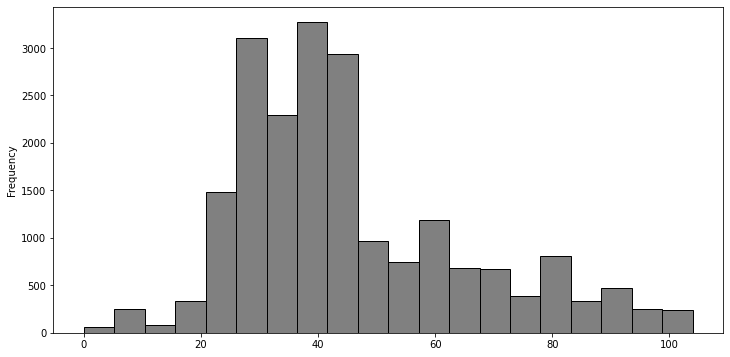

In [ ]:
df['AGE'].plot(kind='hist', bins=20, figsize=(12,6), facecolor='grey',edgecolor='black')

In [ ]:
# # binning age column and remove age attribute
# bins = [i for i in range(df.AGE.min(), df.AGE.max(), 10)]
# df['AGE_BINS'] = pd.cut(x=df['AGE'], bins=bins)
# df.drop(["AGE_BINS"], axis=1, inplace=True)

In [ ]:
# distribution of GENDER attribute
# sns.countplot(x="variable", hue= "value", data=pd.melt(df[["AGE_BINS"]]))

In [ ]:
# removing outlier
df = df[(df.AGE < 90) & (df.AGE > 20)]
df.shape

(19101, 9)


### Boxplot and Remove Outlier
Another way to visualize the distribution of a variable is a boxplot

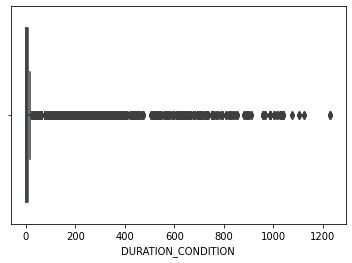

In [ ]:
sns.boxplot(x=df["DURATION_CONDITION"])

In [ ]:
df = df[df["DURATION_CONDITION"]<1200]
df.shape

(19094, 9)

### Countplot

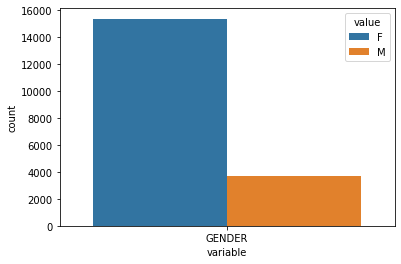

In [ ]:
# distribution of GENDER attribute
sns.countplot(x="variable", hue= "value", data=pd.melt(df[["GENDER"]]))

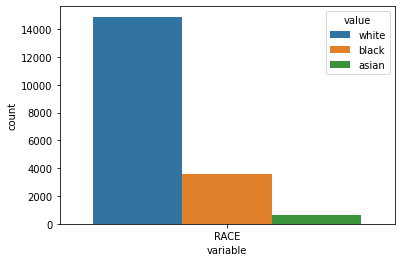

In [ ]:
# distribution of RACE attribute
sns.countplot(x="variable", hue= "value", data=pd.melt(df[["RACE"]]))

In [ ]:
# convert categorical variable to numerical by replacing
df.GENDER.replace(['M', 'F'], [0, 1], inplace=True)
df.RACE.replace(["white", "black", "asian"], [1, 2, 3], inplace=True)


##  Multivariate Analysis: Analyzing Relationships Between Variables

Correlation matrices and scatterplots are useful for exploring the relationship between two variables.


### Correlation Matrix


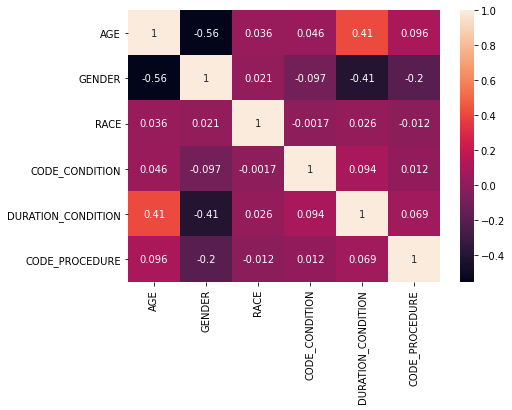

In [ ]:
# Generating the correlating matrix
corr = df.corr()
plt.figure(figsize=(7, 5))
# Generating the correlation heat-map
sns.heatmap(corr, annot=True)

In [ ]:
# df subset contains numerical variables
numdf = df.select_dtypes(include=np.number)
# df subset contains categorical variables
catdf = df.select_dtypes(exclude=np.number)
numdf.shape, catdf.shape

((19094, 6), (19094, 3))



We can remove high correlated variables.





In [ ]:

# select feature with correlation less than a threshold
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.7:
            if columns[j]:
                columns[j] = False

selected_columns = numdf.columns[columns]
selected_columns


Index(['AGE', 'GENDER', 'RACE', 'CODE_CONDITION', 'DURATION_CONDITION',
       'CODE_PROCEDURE'],
      dtype='object')

In [ ]:
# new dataset after removing high correlated features
df = pd.concat([df[selected_columns], catdf], axis=1)
df.shape

(19094, 9)

### Scatterplot


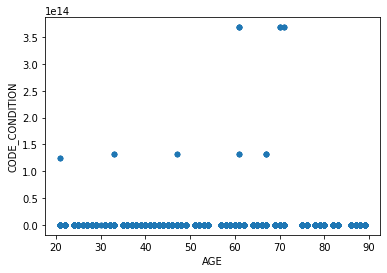

In [ ]:
df.plot(kind='scatter', y='CODE_CONDITION', x='AGE')


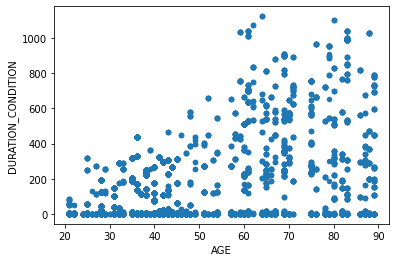

In [ ]:
df.plot(kind='scatter', y='DURATION_CONDITION', x='AGE')

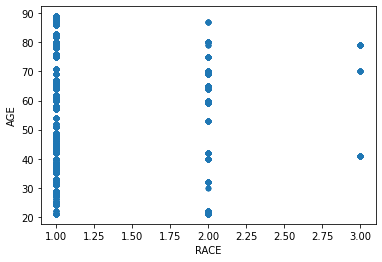

In [ ]:
df.plot(kind='scatter', y='AGE', x='RACE')


# Modelling Data

We can use classification methods to create a model and find the relation between some independent variables such as age, race, gender, code_condition and target attribute (code_procedure).

This section includes:
* Data preparation:    
    * shuffling dataset
    * converting categorical features to numerical (if necessary)
    * spliting data to features and target variables
    * spliting data to train, validation and test data, 70% for train, 15% for test and validation.
* Training and parameter tuning
    * RandomForest
    * XGBoost
* Evaluation
* Prediction



In [ ]:
# import python packages for ML models
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

from sklearn.model_selection import  GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

## Data Preparation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19094 entries, 0 to 87355
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   AGE                    19094 non-null  int64 
 1   GENDER                 19094 non-null  int64 
 2   RACE                   19094 non-null  int64 
 3   CODE_CONDITION         19094 non-null  int64 
 4   DURATION_CONDITION     19094 non-null  int64 
 5   CODE_PROCEDURE         19094 non-null  int64 
 6   Id                     19094 non-null  object
 7   CONDITION_DESCRIPTION  19094 non-null  object
 8   PROCEDURE_DESCRIPTION  19094 non-null  object
dtypes: int64(6), object(3)
memory usage: 1.5+ MB


In [ ]:
# shuffle data, frac=1 means 100 percent of dataset will be shuffled
df = df.sample(frac=1)

In [ ]:
df.shape

(19094, 9)

In [ ]:
# split data to train, test and validation dataframes 
train_ratio = 0.70
validation_ratio = 0.15
test_ratio = 0.15

# test df is now 15% of the entire data set
df_train, df_test = train_test_split(df, test_size=test_ratio, random_state=0)
df_train.shape, df_test.shape

((16229, 9), (2865, 9))

In [ ]:
# split data to features and target dataframes 
X = df_train.drop(["Id", "CODE_PROCEDURE", "CONDITION_DESCRIPTION", 'PROCEDURE_DESCRIPTION'], axis=1)
y = df_train["CODE_PROCEDURE"]

# split data to train and validation dataframes 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=validation_ratio, random_state=0)

X_train.shape, X_val.shape

((13794, 5), (2435, 5))

## RandomForest Model

### Training

In [ ]:
# RandomForest Classifier
rf = RandomForestClassifier(n_estimators=10, max_depth=6, random_state=0)
rf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

### Ranking the Features

Feature ranking:
1. feature 0 (0.431765)
2. feature 1 (0.322866)
3. feature 4 (0.118912)
4. feature 3 (0.074171)
5. feature 2 (0.052286)


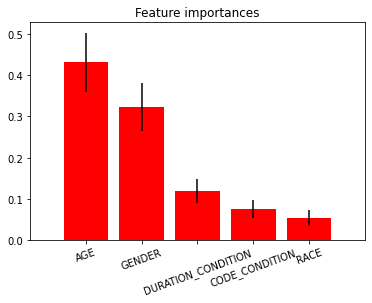

In [ ]:
# feature importance
importances = rf.feature_importances_
features = X.columns

std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=20)
plt.xlim([-1, X.shape[1]])
plt.show()

### Model Evaluation


In [ ]:
# predicted value for train and test dataset
pred_train = rf.predict(X_train)
pred_val = rf.predict(X_val)

In [ ]:
# calculate Accuracy score for train and validation data
acc_train = accuracy_score(y_train, pred_train)
acc_val = accuracy_score(y_val, pred_val)

acc_train, acc_val

(0.10316079454835436, 0.09034907597535935)

## Xgboost Model (**Grid Search**)

### Training

In [ ]:
# Create the parameter grid search
param_grid = {
    'learning_rate': [0.05, 0.5], #so called `eta` value    
    'max_depth': [2, 5, 10, 15],
    'colsample_bytree': [0.4],
    # "objective" :["reg:tweedie"],
    'gamma':[0],               
    'min_child_weight':[1.5],
    'n_estimators' : [5, 10],                                                                    
    'reg_alpha': [0.75],
    'reg_lambda' : [0.45],
    'subsample' : [0.6],
    'seed' : [42]
}
   
# Create a based model
xgb = XGBClassifier()
# Instantiate the grid search model
grid_search_xgb = GridSearchCV(estimator = xgb, 
                               param_grid=param_grid,
                               cv=3,
                               n_jobs=-1,
                               verbose=2)

In [ ]:
# Fit the grid search to the data
grid_search_xgb.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  2.0min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_po...
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.4], 'gamma': [0],
                         'learning_rate': [0.05, 0.5],
                         'max_depth': [2, 5, 10, 15], 'min_child_weight': [1.5],
         

In [ ]:
# best parameters after grid search
grid_search_xgb.best_params_

{'colsample_bytree': 0.4,
 'gamma': 0,
 'learning_rate': 0.05,
 'max_depth': 5,
 'min_child_weight': 1.5,
 'n_estimators': 10,
 'reg_alpha': 0.75,
 'reg_lambda': 0.45,
 'seed': 42,
 'subsample': 0.6}

### Model Evaluation


In [ ]:
# Best model
best_grid_xgb = grid_search_xgb.best_estimator_

# Evaluating the Algorithm for train data
pred_train_xgb = best_grid_xgb.predict(X_train)
print('Accuracy for train data:', accuracy_score(y_train, pred_train_xgb))  

# Evaluating the Algorithm for test data
pred_test_xgb = best_grid_xgb.predict(X_val)
acc_xgb = round(accuracy_score(y_val, pred_test_xgb), 5)
print('Accuracy for test data:', acc_xgb)

Accuracy for train data: 0.10069595476294041
Accuracy for test data: 0.09651


## Prediction

In [ ]:
df_test.shape

(2865, 9)

In [ ]:
df_test.columns

Index(['AGE', 'GENDER', 'RACE', 'CODE_CONDITION', 'DURATION_CONDITION',
       'CODE_PROCEDURE', 'Id', 'CONDITION_DESCRIPTION',
       'PROCEDURE_DESCRIPTION'],
      dtype='object')

In [ ]:
selected_columns = X.columns

In [ ]:

x_test = df_test[X.columns]
df_test["RF_prediction"] = rf.predict(x_test)
df_test["XGB_prediction"] = best_grid_xgb.predict(x_test)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
df_test.head()

,AGE,GENDER,RACE,CODE_CONDITION,DURATION_CONDITION,CODE_PROCEDURE,Id,CONDITION_DESCRIPTION,PROCEDURE_DESCRIPTION,RF_prediction,XGB_prediction
36784,61,1,1,162864005,260,261352009,813b0cd1-ff24-8c8e-1d2a-e79782ffc608,Body mass index 30+ - obesity (finding),Face mask (physical object),430193006,430193006
3805,40,1,2,444814009,0,66348005,cebf1170-4239-424b-e9e6-7ff000595af3,Viral sinusitis (disorder),Childbirth,5880005,5880005
61767,32,1,2,49727002,1,165829005,ec2a5243-294f-3842-b2f8-dca626ffe9b4,Cough (finding),Gonorrhea infection test,5880005,5880005
19171,38,1,1,370247008,0,10383002,8ba5469f-0e7d-8f3a-2c26-e5996ffcaa90,Facial laceration,Counseling for termination of pregnancy,5880005,5880005
10684,54,1,1,840544004,0,261352009,6cf1912d-22da-29d6-4469-8d85ac6ba09d,Suspected COVID-19,Face mask (physical object),261352009,430193006


#Exporting Results to an Excel File

In [ ]:
df.to_excel("Procedure_prediction.xlsx", index=False, sheet_name="Prediction")